In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

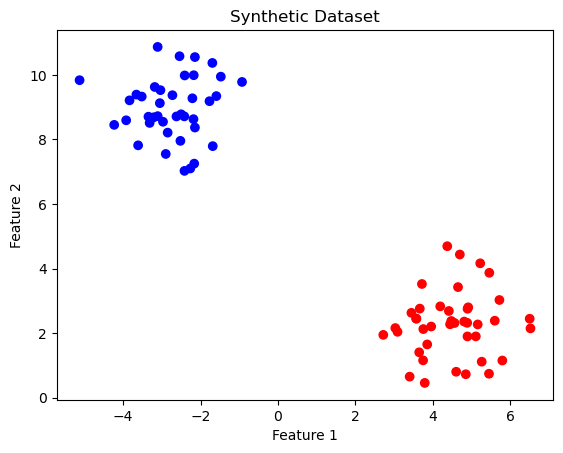

In [3]:
# Generate synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset')
plt.show()

In [5]:
class Adaline:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.errors.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

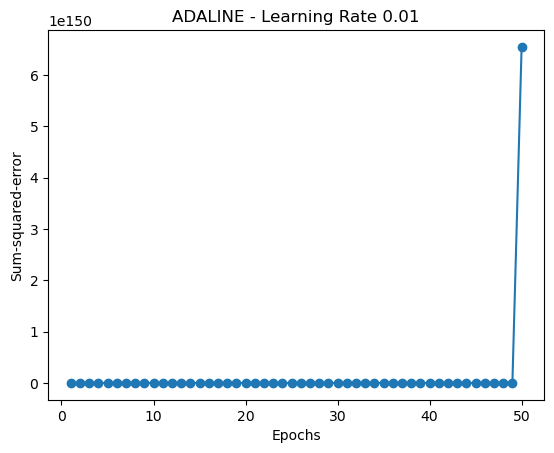

Training Accuracy: 5.00%
Test Accuracy: 10.00%


In [6]:
adaline = Adaline(learning_rate=0.01, epochs=50)
adaline.fit(X_train, y_train)

# Plot the cost function
plt.plot(range(1, len(adaline.errors) + 1), adaline.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('ADALINE - Learning Rate 0.01')
plt.show()

# Evaluate the model
y_pred_train = adaline.predict(X_train)
accuracy_train = np.mean(y_pred_train == y_train) * 100
print(f'Training Accuracy: {accuracy_train:.2f}%')

y_pred_test = adaline.predict(X_test)
accuracy_test = np.mean(y_pred_test == y_test) * 100
print(f'Test Accuracy: {accuracy_test:.2f}%')

In [7]:
class Madaline:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros((1 + X.shape[1], len(np.unique(y))))
        self.errors = []

        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                errors = target - output
                self.weights[1:] += self.learning_rate * xi[:, np.newaxis] * errors
                self.weights[0] += self.learning_rate * errors
                cost = 0.5 * errors ** 2
                self.errors.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.argmax(self.net_input(X), axis=1)

In [8]:
madaline = Madaline(learning_rate=0.01, epochs=50)
madaline.fit(X_train, y_train)

# Evaluate the model
y_pred_train_madaline = madaline.predict(X_train)
accuracy_train_madaline = np.mean(y_pred_train_madaline == y_train) * 100
print(f'Training Accuracy (MADALINE): {accuracy_train_madaline:.2f}%')

y_pred_test_madaline = madaline.predict(X_test)
accuracy_test_madaline = np.mean(y_pred_test_madaline == y_test) * 100
print(f'Test Accuracy (MADALINE): {accuracy_test_madaline:.2f}%')

Training Accuracy (MADALINE): 48.75%
Test Accuracy (MADALINE): 55.00%
